In [6]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$\dot{\theta} = \omega$$
$$\dot{\omega} = \frac{(m+m_c)g\sin{\theta} - \cos{\theta}(u + ml\omega^2\sin{\theta})}{(4/3)(m+m_c)l - ml\cos{\theta}^2}$$
$$\dot{h} = dh$$
$$\dot{dh} = \frac{u + ml(\omega^2\sin{\theta} - \dot{\omega}\cos{\theta})}{m + m_c}$$

In [12]:
from pendulum import InvertedPendulumSystem
from simulator import Simulator
from buffer import IterationBuffer
from model import GaussianPDFModel
from optimizer import Optimizer
from policy_reinforce import PolicyREINFORCE
from monte_carlo import MonteCarloSimulationScenario
%autoreload 2

Text(0.5, 1.0, 'horizontal angular')

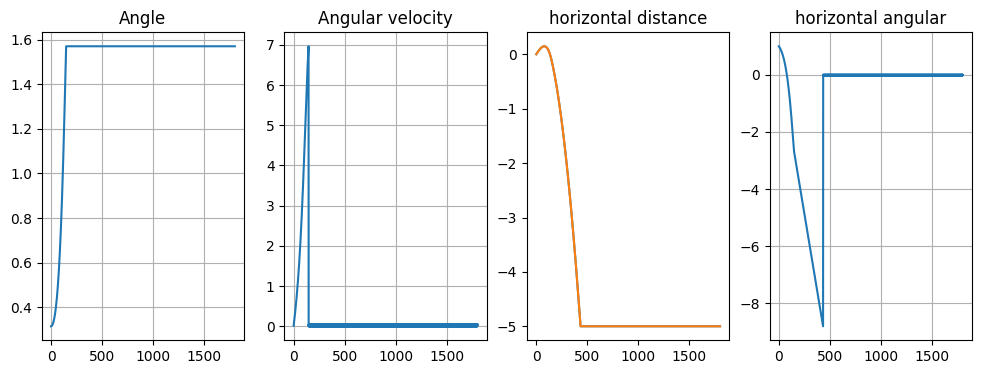

In [8]:
system = InvertedPendulumSystem()
simulator = Simulator(
    system, N_steps=1800, step_size=0.003, state_init=np.array([np.pi / 10, 0.0, 0.0, 1])
)
simulator.reset()

observations = []
actions = []
while simulator.step():
    (
        observation,
        action,
        step_idx,
    ) = simulator.get_sim_step_data()

    new_action = np.array([-5 * observation[0] + -2 * observation[1]])

    system.receive_action(new_action)
    observations.append(np.copy(observation))
    actions.append(np.copy(new_action))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(12, 4)
ax1.plot(np.array(observations)[:, 0])
ax1.grid()
ax1.set_title("Angle")
ax2.plot(np.array(observations)[:, 1])
ax2.grid()
ax2.set_title("Angular velocity")
ax3.plot(np.array(observations)[:, 2])
ax3.grid()
ax3.set_title("horizontal distance")
ax3.plot(np.array(observations)[:, 2])
ax3.grid()
ax3.set_title("horizontal distance")
ax4.plot(np.array(observations)[:, 3])
ax4.grid()
ax4.set_title("horizontal angular")

In [13]:
SEED = 14
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)

system = InvertedPendulumSystem()

simulator = Simulator(
    system, N_steps=1000, step_size=0.003, state_init=np.array([0.0, 0.0, 0.0, 0.0])
)
model = GaussianPDFModel(
    dim_observation=system.dim_observation,
    dim_action=system.dim_action,
    action_bounds=np.array([[-20, 20]]),
    scale_factor=10,  # TRY TO FIND scale_factor EMPIRICALLY
    dim_hidden=4, # TRY TO FIND dim_hidden EMPIRICALLY
    std=0.1, # TRY TO FIND STD EMPIRICALLY
    n_hidden_layers=1 # TRY TO FIND STD EMPIRICALLY
)

optimizer = Optimizer(
    model=model,
    opt_method=torch.optim.Adam,
    #---------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    opt_options=dict(lr=0.05), # TRY TO FIND lr EMPIRICALLY
    #---------------------------------------------------------------------------
)
## Or if you want to use scheduler then initialize optimizer, via, for instance
# lr_scheduler_fading_coeff = 1
# optimizer = Optimizer(
#     model=model,
#     opt_method=torch.optim.Adam,
#     opt_options=dict(lr=1.0, betas=(0.8, 0.9)),
#     shuffle=False,
#     lr_scheduler_method=torch.optim.lr_scheduler.MultiplicativeLR,
#     lr_scheduler_options={
#         "lr_lambda": lambda iteration: 1
#         / np.sqrt((iteration / lr_scheduler_fading_coeff) ** 2 + 1)
#     },
#     lr_scheduler_switch=LRSchedulerSwitch(norm_observation_threshold=0.1),
# )
#
# BELEIVE US! YOU CAN SOLVE THIS TASK WITHOUT SCHEDULER

policy = PolicyREINFORCE(model, optimizer, is_with_baseline=True)


# This termination criterion never terminates episodes
trivial_termination_criterion = lambda *args: False

## EXAMPLE. This termination criterion terminates episode if observation norm >= 20

termination_criterion = (
    lambda observation, action, running_objective, total_objective: (
        np.abs(observation[0]) > np.pi / 3
    )
)


scenario = MonteCarloSimulationScenario(
    simulator=simulator,
    system=system,
    policy=policy,
    N_episodes=2, # Increasing the number of episodes stabilizes learning, but you can manage it with N_episodes=1
    N_iterations=300, # You can change the number of iterations if you want
    termination_criterion=termination_criterion,
    discount_factor=0.99,
)

try:
    scenario.run()
except KeyboardInterrupt:
    clear_output(wait=True)
    scenario.plot_data()

clear_output(wait=True)
scenario.plot_data()

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 344 344
344 

100%|██████████| 2/2 [00:01<00:00,  1.76it/s]


339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 344 339
339 

100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 339 319
319 

100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 319 313
313 

100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314
314 313 314


IndexError: index 313 is out of bounds for axis 0 with size 313